In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### ---- DATA ----
Data comes from https://www.kaggle.com/c/ga-customer-revenue-prediction. 

Here are a few words about it:
I'll simplify a bit the context, we don't need to know everything for our purposes.

Each observation presents one visit of a customer to a store. 
Each visit is characterized by some numeric and categorical quantities:

Numeric columns:
    - totals_bounces
    - totals_hits
    - totals_pageviews
    - totals_transactionRevenue

Categorical columns:
    - channelGrouping
    - device_browser
    - geo_network_city
    - geo_network_continent
    - traffic_source
    
One customer can visit a store a couple of times. 
The kaggle data is filtered in such a way that it contains customers that visited a store at least twice. 
Only 50k customers were samples. 

We talked here about "store", we don't care about them, we can even assume that there is only one. 

There are columns that will be important to us:
    - fullVisitorId (we identify a visitor by this column)
    - visitStartTime (as the name suggests, it is registed the start time of visit)
    - visit_number (for each visitor, 1, 2, 3, ..), as was said above for each seller for exists 1 and 2. 

In [2]:
visitors_df = pd.read_csv("data/visitors_data.csv",  dtype={
                       'fullVisitorId': str
                   })

In [3]:
visitors_df.shape

(151322, 13)

In [4]:
visitors_df.head(1)

,fullVisitorId,channelGrouping,visitStartTime,totals_bounces,totals_hits,totals_pageviews,totals_transactionRevenue,device_browser,device_is_mobile,geo_network_city,geo_network_continent,traffic_source,visit_number
0,0000040862739425590,Paid Search,2017-02-11 18:09:31,0.0,2.0,2.0,0.0,Chrome,False,Oakland,Americas,google,1


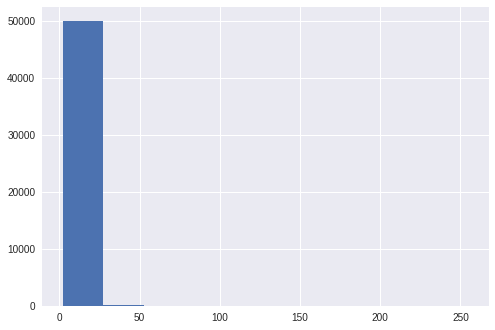

In [5]:
visitors_df.groupby('fullVisitorId')['visit_number'].max().hist()

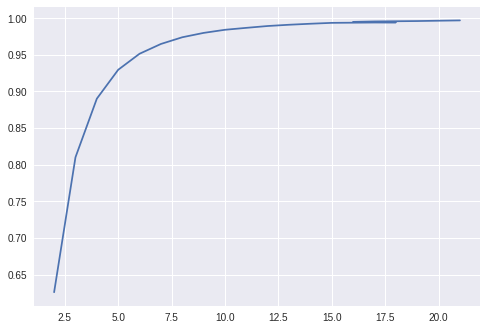

In [13]:
# most of customers visited the store less than 20 times
x = visitors_df.groupby('fullVisitorId')['visit_number'].max()
(x.value_counts().cumsum().iloc[:20] / len(x)).plot()

#### ---- DATA ----
Let's first look at continous columns. 

In [14]:
# it seems to be actually discrete variable 
visitors_df['totals_bounces'].value_counts()

0.0    90520
1.0    60802
Name: totals_bounces, dtype: int64

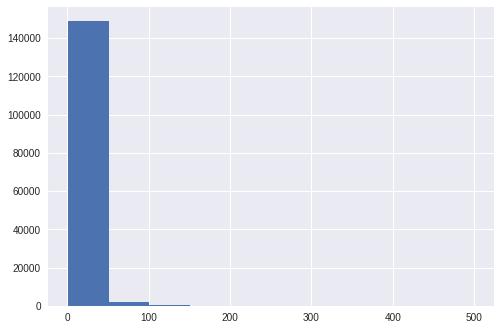

In [15]:
visitors_df['totals_hits'].hist()

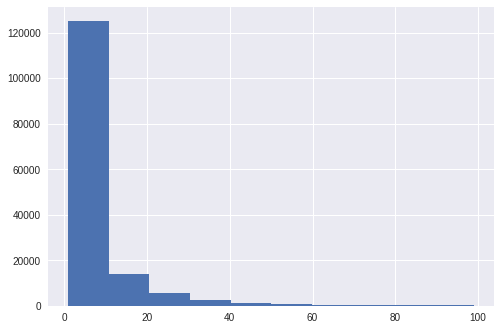

In [17]:
visitors_df[visitors_df['totals_hits'] < 100]['totals_hits'].hist();

In [18]:
visitors_df['totals_hits'].value_counts().iloc[:5] / visitors_df.shape[0]

1.0    0.399070
2.0    0.125091
3.0    0.080352
4.0    0.054757
5.0    0.042076
Name: totals_hits, dtype: float64

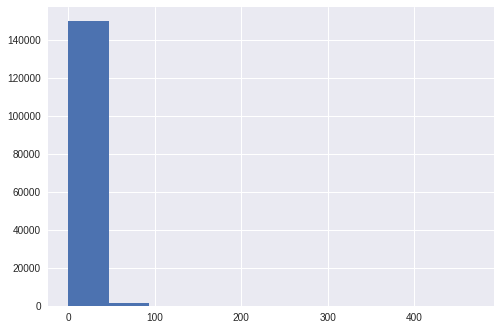

In [19]:
visitors_df['totals_pageviews'].hist();

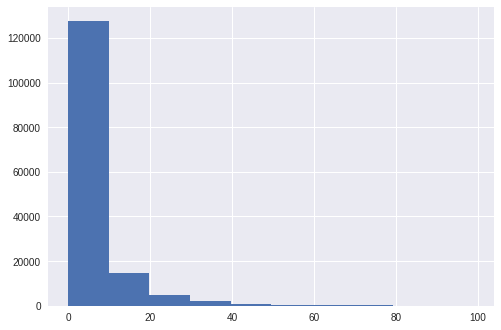

In [20]:
visitors_df[visitors_df['totals_pageviews'] < 100]['totals_pageviews'].hist();

In [21]:
visitors_df['totals_pageviews'].value_counts().iloc[:5] / visitors_df.shape[0]

1.0    0.405011
2.0    0.130933
3.0    0.086980
4.0    0.060824
5.0    0.047389
Name: totals_pageviews, dtype: float64

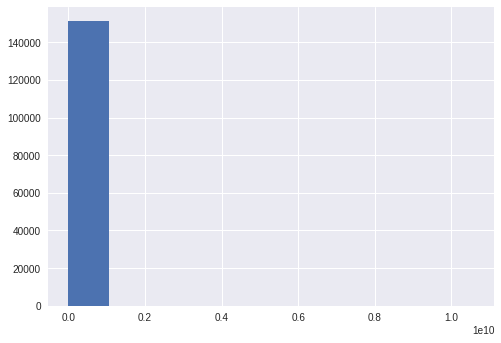

In [22]:
visitors_df['totals_transactionRevenue'].hist()

In [24]:
(visitors_df['totals_transactionRevenue'] == 0).mean()

0.97041408387412276

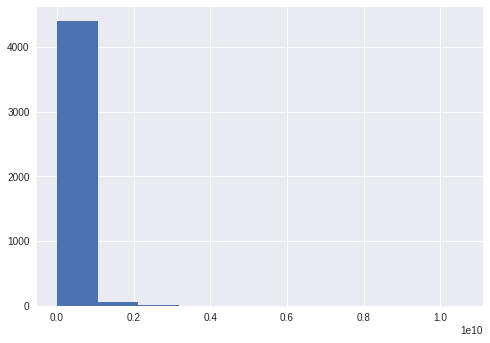

In [25]:
visitors_df[visitors_df['totals_transactionRevenue'] > 0]['totals_transactionRevenue'].hist()

In [26]:
print('min non-zero values: {}'.format(visitors_df[visitors_df['totals_transactionRevenue'] > 0]['totals_transactionRevenue'].min()))
print('max non-zero values: {}'.format(visitors_df[visitors_df['totals_transactionRevenue'] > 0]['totals_transactionRevenue'].max()))

min non-zero values: 40000.0
max non-zero values: 10589140000.0


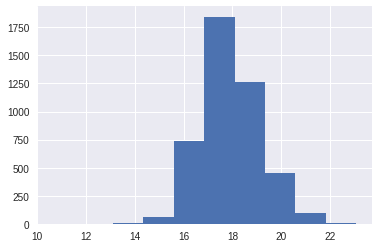

In [28]:
np.log(visitors_df[visitors_df['totals_transactionRevenue'] > 0]['totals_transactionRevenue']).hist()

#### ---- DATA ----
Let's now look at categorical columns. 

In [29]:
visitors_df['channelGrouping'].value_counts()

Organic Search    62510
Referral          33634
Direct            29334
Social            12743
Paid Search        7384
Affiliates         3122
Display            2536
(Other)              59
Name: channelGrouping, dtype: int64

In [31]:
visitors_df['device_browser'].value_counts()

Chrome                      121125
Safari                       21082
Firefox                       4175
Internet Explorer             1374
Edge                          1120
Android Webview                625
Safari (in-app)                552
Opera                          401
Opera Mini                     263
UC Browser                     182
Amazon Silk                    108
YaBrowser                       97
Mozilla Compatible Agent        57
Android Browser                 51
Maxthon                         30
Coc Coc                         25
Nintendo Browser                25
BlackBerry                       8
Seznam                           5
LYF_LS_4002_12                   4
Puffin                           3
DASH_JR_3G                       3
MRCHROME                         2
Nokia Browser                    2
no-ua                            2
Mozilla                          1
Name: device_browser, dtype: int64

In [33]:
visitors_df['geo_network_city'].value_counts()

not available in demo dataset        70517
Mountain View                        13291
New York                              7349
San Francisco                         5506
Sunnyvale                             4155
(not set)                             3922
San Jose                              2800
London                                2215
Chicago                               2156
Los Angeles                           2135
Seattle                               1481
Salem                                 1168
Toronto                               1126
Austin                                1086
Santa Clara                           1000
Palo Alto                              958
Dublin                                 852
Ann Arbor                              813
Paris                                  730
Montreal                               712
Sydney                                 679
Kirkland                               676
Singapore                              676
Tel Aviv-Ya

In [34]:
visitors_df['geo_network_continent'].value_counts()

Americas     99599
Europe       25460
Asia         23086
Oceania       1903
Africa        1156
(not set)      118
Name: geo_network_continent, dtype: int64

In [35]:
visitors_df['traffic_source'].value_counts()

google                                               69343
(direct)                                             29334
mall.googleplex.com                                  24188
youtube.com                                          10579
analytics.google.com                                  4568
Partners                                              3126
dfa                                                   2385
sites.google.com                                      1005
mail.google.com                                        603
facebook.com                                           470
google.com                                             468
gdeals.googleplex.com                                  386
quora.com                                              347
reddit.com                                             321
groups.google.com                                      315
m.facebook.com                                         269
bing                                                   2

#### ---- Problem statement ---- 
We will learn later that in survival analysis one of the most important concept is "the event". It can be understood intuitively but it will be introduced more formally later. 

For us the event is the visit of a customer to the store. 

<b>Given the information about the first visit, we would like to know how much time has to pass until the second visit.</b> 

Later we might be interested in different questions.

Our main purpose is to learn how to deal with censored data. We will slowly get to that point. For now, let's be more specific about the problem definition. But before doing so we have to look at data first. We have to make 
sure that created problem makes sense!

In [38]:
first_visits = visitors_df[visitors_df['visit_number'] == 1][['fullVisitorId', 'visitStartTime']].set_index('fullVisitorId')
second_visits = visitors_df[visitors_df['visit_number'] == 2][['fullVisitorId', 'visitStartTime']].set_index('fullVisitorId')

In [39]:
first_visits.head(2)

,visitStartTime
fullVisitorId,
0000040862739425590,2017-02-11 18:09:31
0000174067426171406,2016-11-11 06:44:01


In [41]:
first_visits = first_visits.rename(columns={'visitStartTime': 'first_visit'})
second_visits = second_visits.rename(columns={'visitStartTime': 'second_visit'})
first_visits = first_visits.join(second_visits)
first_visits.head(2)

,first_visit,second_visit
fullVisitorId,,
0000040862739425590,2017-02-11 18:09:31,2017-02-11 18:47:04
0000174067426171406,2016-11-11 06:44:01,2016-11-12 05:05:57


In [46]:
first_visits['first_visit'] = pd.to_datetime(first_visits['first_visit'])
first_visits['second_visit'] = pd.to_datetime(first_visits['second_visit'])
first_visits['duration'] = (first_visits['second_visit'] - first_visits['first_visit']) / pd.to_timedelta('1 second')

In [47]:
first_visits.head(2)

,first_visit,second_visit,duration
fullVisitorId,,,
0000040862739425590,2017-02-11 18:09:31,2017-02-11 18:47:04,2253.0
0000174067426171406,2016-11-11 06:44:01,2016-11-12 05:05:57,80516.0


####  ---- Problem statement ---- 
From the store's point of view, there's no point in asking how many seconds might pass until the second visit. 
We don't need such granularity. Hours, days or even weeks are closer to real needs.

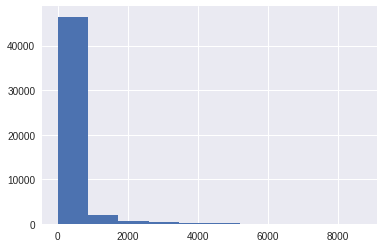

In [50]:
# hours
(first_visits['duration'] / 3600).hist()

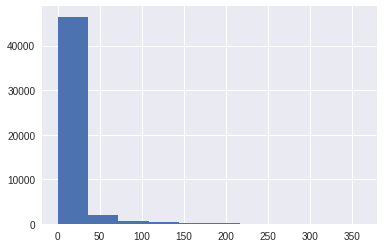

In [52]:
# days
(first_visits['duration'] / (24 * 3600)).hist()

In [54]:
(first_visits['duration'].map(lambda x: int(x / (24 * 3600))).value_counts() / first_visits.shape[0]).iloc[:10]

0    0.51176
1    0.07156
2    0.04036
3    0.02940
4    0.02450
6    0.02252
5    0.02138
7    0.01846
8    0.01422
9    0.01198
Name: duration, dtype: float64

In [55]:
first_visits['first_visit'].min(), first_visits['first_visit'].max()

(Timestamp('2016-08-01 07:08:12'), Timestamp('2017-08-02 06:05:11'))

In [56]:
first_visits['second_visit'].min(), first_visits['second_visit'].max()

(Timestamp('2016-08-01 08:52:23'), Timestamp('2017-08-02 06:53:32'))

####  ---- Problem statement ---- 
Data is never perfect. Let's settle on days. 

If we left the problem in this moment. We could apply regression techniques to solve it. There is some time-series aspect, but in this formulation is not even noticeable. 

The real practical use of the methods we are going to learn about is when data is censored. It will be explained using a simple example. Suppose that a customer visited the store on Monday and the second visit is on Friday. In this situation our target variable would be 4. But suppose we need to take some actions on Wednesday. What we know is that 2 days passed since the first visit and the second one is still to come. If we had to build a regression model, we would have to take some actions with variables as these. Either drop them from fitting or set a target variable as 2. How bad is this solution depends on the proportion of such variables, called censored variables. 

So we want to simulate such a situation. We've seen first visits and are going to build prediction model for second one, <b>some time after first visit</b>. 

Someone can see this problem in these settings. 

The main problem is the fact the first visits haven't happened in the same moment. They span 2016-08-01:2017-08-02 period. In our analysis will ignore it. What we are interested in is the time to the second visit given some features. 

We'll take the point of observation where 20% of data has uncensored data and the rest of it is censored. This might be closer to applications such as churn. 

In [58]:
first_visits.head(1)

,first_visit,second_visit,duration
fullVisitorId,,,
0000040862739425590,2017-02-11 18:09:31,2017-02-11 18:47:04,2253.0


In [59]:
first_visits['duration_day'] = first_visits['duration'].map(lambda x: x / (24 * 3600))

In [60]:
first_visits.head(1)

,first_visit,second_visit,duration,duration_day
fullVisitorId,,,,
0000040862739425590,2017-02-11 18:09:31,2017-02-11 18:47:04,2253.0,0.026076


In [62]:
censored = []
durations = []
for _, row in first_visits.iterrows():
    if np.random.uniform(0, 1) < 0.5:
        censored.append(1)
        durations.append(np.random.uniform(0.01, 0.99) * row['duration_day'])
    else:
        censored.append(0)
        durations.append(row['duration_day'])

In [63]:
first_visits['censored'] = censored
first_visits['censored_durations'] = durations

In [64]:
first_visits.head(1)

,first_visit,second_visit,duration,duration_day,censored,censored_durations
fullVisitorId,,,,,,
0000040862739425590,2017-02-11 18:09:31,2017-02-11 18:47:04,2253.0,0.026076,0,0.026076


In [65]:
first_visits.reset_index().to_csv('data/censored_visitors_data.csv', index=False)